# Analysis of Real Estate Listings in St. Petersburg and Suburbs

## 1. Introduction

This project focuses on analyzing data from **Yandex Real Estate**, which includes a comprehensive archive of apartment listings in St. Petersburg and nearby areas over several years. The primary objective is to identify factors that influence the pricing of real estate properties and to determine their market value accurately. The analysis aims to establish an automated system capable of detecting anomalies and fraudulent activity within the dataset.

The dataset includes two types of data for each listing:
1. **User-provided data**: Information entered manually by the user, such as the number of rooms, total area, and price.
2. **Automatically generated data**: Data derived from geographic services, including proximity to the city center, parks, and bodies of water.

By exploring and processing this data, the project will identify patterns and trends that impact real estate prices. Additionally, the project will evaluate the time required to sell properties and assess other significant factors affecting real estate dynamics in the region.

---

### Objectives


1. **Explore and preprocess the data**:
   - Understand the dataset structure and address missing values.
   - Standardize data formats and remove duplicates.
   - Enrich the dataset with new calculated columns to improve analysis.


2. **Perform exploratory data analysis**:
   - Investigate key parameters of real estate listings, such as total area, living area, and kitchen area.
   - Identify and correct outliers and anomalies in the data.
   - Examine relationships between various features and property prices.


3. **Determine factors influencing price**:
   - Analyze the impact of total area, living area, number of rooms, and floor type on property prices.
   - Study how location, proximity to parks, and distance from the city center affect pricing.


4. **Understand property sales dynamics**:
   - Calculate the average and median time required to sell a property.
   - Identify what constitutes a "fast" or "slow" sale.


5. **Summarize findings**:
   - Provide a detailed report on the significant factors affecting real estate prices.
   - Highlight trends and insights that could help in detecting anomalies and optimizing pricing strategies.

---

### Dataset Description

The dataset contains the following key columns:
- `airports_nearest`: Distance to the nearest airport (in meters).
- `balcony`: Number of balconies.
- `ceiling_height`: Ceiling height (in meters).
- `cityCenters_nearest`: Distance to the city center (in meters).
- `days_exposition`: Duration of the listing (in days).
- `first_day_exposition`: Date the listing was published.
- `floor`: Apartment floor number.
- `floors_total`: Total number of floors in the building.
- `is_apartment`: Whether the property is classified as an apartment (Boolean).
- `kitchen_area`: Kitchen area (in square meters).
- `last_price`: Listing price at the time of removal.
- `living_area`: Living area (in square meters).
- `locality_name`: Name of the locality.
- `open_plan`: Indicates whether the property has an open floor plan (Boolean).
- `parks_around3000`: Number of parks within a 3 km radius.
- `parks_nearest`: Distance to the nearest park (in meters).
- `ponds_around3000`: Number of ponds within a 3 km radius.
- `ponds_nearest`: Distance to the nearest body of water (in meters).
- `rooms`: Number of rooms in the apartment.
- `studio`: Indicates whether the property is a studio apartment (Boolean).
- `total_area`: Total area of the apartment (in square meters).
- `total_images`: Number of images provided in the listing.

---

### Project Workflow

#### Step 1: Data Exploration
- Load the dataset and examine its structure.
- Visualize the distribution of numerical columns using histograms.

#### Step 2: Data Preprocessing
- Identify and handle missing values.
- Standardize data types for consistency.
- Eliminate duplicates and clean up location names.

#### Step 3: Feature Engineering
- Add new columns for:
  - Price per square meter.
  - Weekday, month, and year of listing publication.
  - Apartment floor type (e.g., "first," "last," "other").
  - Distance to the city center in kilometers.

#### Step 4: Exploratory Data Analysis
- Study the distribution and relationships of key parameters.
- Analyze the time required to sell properties.
- Identify and correct outliers and anomalies.

#### Step 5: Price Influencing Factors
- Investigate the relationship between price and:
  - Total area.
  - Living area and kitchen area.
  - Number of rooms.
  - Floor type.
  - Proximity to city center.

#### Step 6: Insights and Conclusions
- Summarize findings to understand market trends.
- Highlight key factors that determine real estate prices in St. Petersburg and its surroundings.

---

This project will help develop an automated system for anomaly detection and improve pricing strategies in the real estate market.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
if os.path.exists('real_estate_data.csv'):
    data = pd.read_csv('real_estate_data.csv', sep='\t')
    print("Data successfully loaded locally.")
else:
    data = pd.read_csv('https://raw.githubusercontent.com/bronetazik99/Practicum_projects/refs/heads/main/Project2/real_estate_data.csv', sep='\t')
    print("Local data not available. Data loaded from the web.")

Data successfully loaded locally.


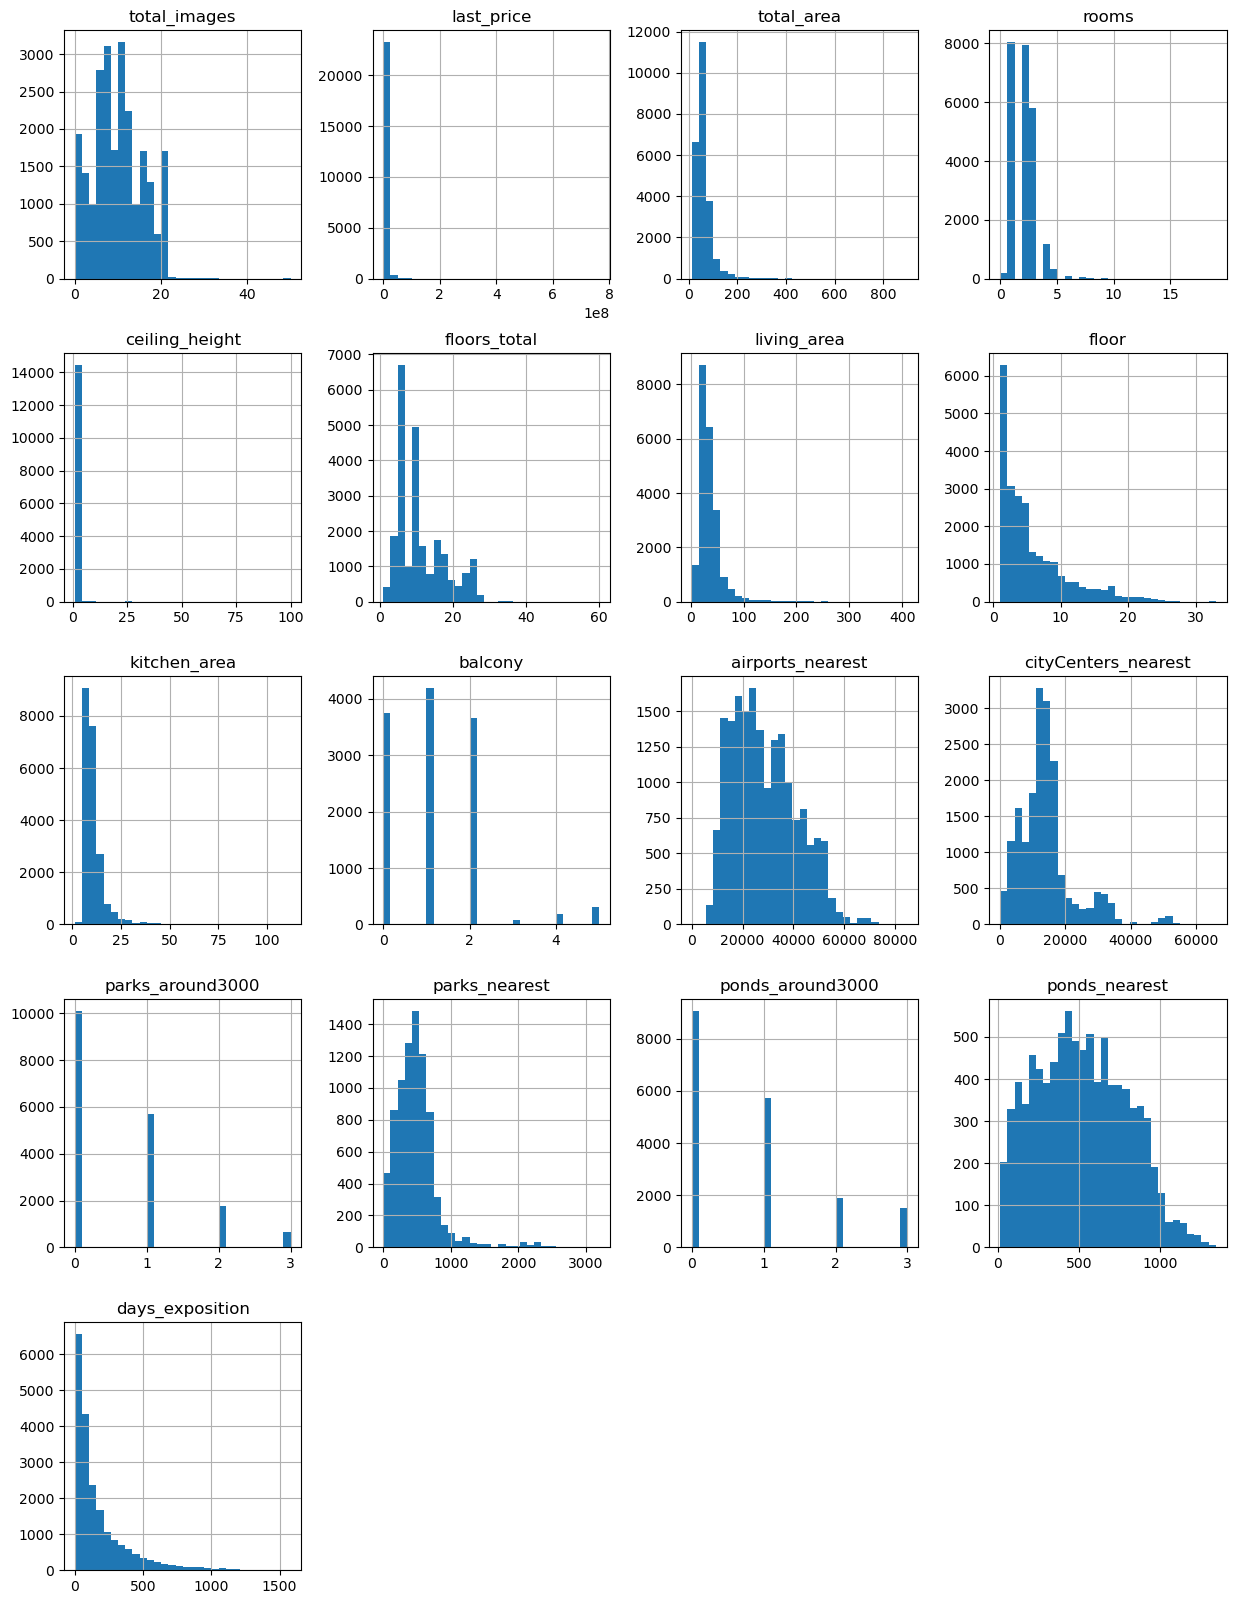

In [3]:
data.hist(figsize=(15, 20), bins=30, grid=True);

The histograms provide a detailed view of the distributions of various features in the dataset:

- **Skewed Distributions**: Features like `last_price`, `total_area`, `living_area`, and `days_exposition` are heavily right-skewed, indicating the presence of outliers and extreme values.
- **Clustered Values**: Variables such as `rooms`, `floor`, and `balcony` show clustering around specific ranges, with most listings having 1-4 rooms and 1-2 balconies.
- **Distance Features**: Proximity metrics (`cityCenters_nearest`, `parks_nearest`, `ponds_nearest`) demonstrate a majority of listings located closer to the city center or amenities but with some distant outliers.
- **Ceiling Height Outliers**: Extreme values in `ceiling_height` (e.g., 25m) suggest data errors or anomalies.

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


The presented dataframe, unfortunately, is not ideal: the publication date is in an incorrect format, there are many missing values in the `ceiling height` column, the total number of floors column can be converted to `int`, and the `is_apartment` and `balcony` columns also have many missing values. These issues will need to be addressed!

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

The dataset contains **22 columns** and **23,699 entries**. Key observations:
- Several columns have missing values, notably:
  - **ceiling_height**: ~39% missing.
  - **is_apartment**: ~88% missing.
  - **balcony**: ~49% missing.
- The **first_day_exposition** column is stored as `object` and needs conversion to datetime.
- Most numerical columns are of type `float64`, with some logical candidates for conversion to `int`.

## Data Preparation

### 2.1 Handling missing values

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Fill missing values in `ceiling_height` with the median value.  

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(value=(data['ceiling_height'].median()))

Fill missing values in `floors_total` with the value of the current floor.

In [8]:
data.loc[data['floors_total'].isna(), 'floors_total'] = data.loc[data['floors_total'].isna()]['floor']

Fll missing values in `living_area`.

In [9]:
# Find the relation between 'living area' and 'total_area'
area_ratio = data['living_area'].sum() / data['total_area'].sum()
print(area_ratio)

# Fill missing values
data.loc[data['living_area'].isna(), 'living_area'] =  data.loc[data['living_area'].isna()]['total_area'] * area_ratio

0.5251307119016166


Fll missing values in `kitchen_area`.

In [10]:
kitchen_ratio = data['kitchen_area'].sum() / data['total_area'].sum()
print(kitchen_ratio)

data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.loc[data['kitchen_area'].isna()]['total_area'] * kitchen_ratio

0.1583103172481819


Fill missing values in `is_apartment` on 'False'.

In [11]:
print(data['is_apartment'].unique())

data['is_apartment'] = data['is_apartment'].fillna(False)

print(data['is_apartment'].unique())

[nan False True]
[False  True]


Replace missing values in `balcony` with 0.

*Assumed reason for missing values*: Sellers without a balcony likely left this field blank.

In [12]:
data['balcony'] = data['balcony'].fillna(0)

Remove 49 rows where the `locality_name` is not specified.

In [13]:
data = data.dropna(subset=['locality_name'])

Replace all missing values in variables ending with "_around3000" with 0, assuming that these objects are not nearby.

For the variables `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, and `ponds_nearest`, we will leave the missing values unchanged for now.

In [14]:
data[['parks_around3000', 'ponds_around3000']] = data[['parks_around3000', 'ponds_around3000']].fillna(0)
    
# Check missing values
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64


The remaining 3,180 missing values in `days_exposition` indicate that these listings were still active at the time the dataset was saved.

### 2.2 Handling duplicates

Remove duplicates in `locality_name`.

In [15]:
# Проверим число уникальных значений
print(data['locality_name'].nunique())

data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'поселок городского типа имени', 'городской поселок', 'коттеджный поселок', 'поселок при железнодорожной станции', 'поселок станции'], 'поселок', regex=True)
    .replace('садоводческое некоммерческое товарищество', 'садовое товарищество')
) 

# Перепроверим число уникальных значений
print(data['locality_name'].nunique())

364
318


Check the duplicates overall in dataset.

In [16]:
data.duplicated().sum()

0

### 2.3 Changing data types

Change the type of the `first_day_exposition` column to 'datetime', and the types of `floors_total` and `balcony` to 'integer', as these variables should be integers.

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int') 
data['balcony'] = data['balcony'].astype('int') 

### 2.4 Adding new columns

Add the price per square meter and round it to 2 decimal places.

In [18]:
data['price_1m2'] = data['last_price'] / data['total_area']
data['price_1m2'] = data['price_1m2'].round(2)

Add columns for weekdays, months, and years.

In [19]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Add a column for the floor type.

In [20]:
data['floor_type'] = ''
data.loc[data['floor'] == 1, 'floor_type'] = 'first'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'last'
data.loc[(data['floor'] !=1) & (data['floor'] != data['floors_total']), 'floor_type'] = 'other'

Add a column for the distance to the city center in kilometers, rounded to the nearest whole number.

In [21]:
data['cityCenters_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_km'] = data['cityCenters_km'].round(0)

## 3. Exploratory Data Analysis (EDA)

### 3.1 Study the parameters of the properties and plot separate histograms for each of these parameters.

Plot a histogram for `total_area`.

<Axes: >

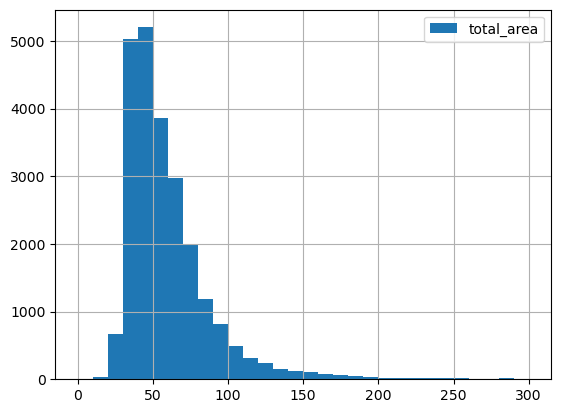

In [22]:
data['total_area'].hist(bins=30, grid=True, legend='total_area', range=(0,300))

Remove outliers above 150.

In [23]:
data = data[data['total_area'] <= 150]


Plot a histogram for `living_area`.

<Axes: >

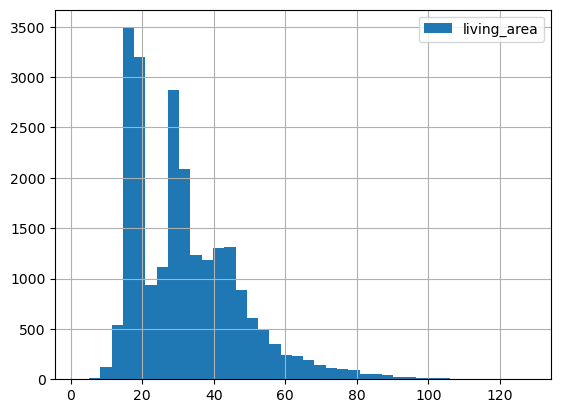

In [24]:
data['living_area'].hist(bins=40, grid=True, legend='living_area')

Remove outliers above 150.

In [25]:
data = data[data['living_area'] <= 150]

Plot a histogram for `kitchen_area`.

<Axes: >

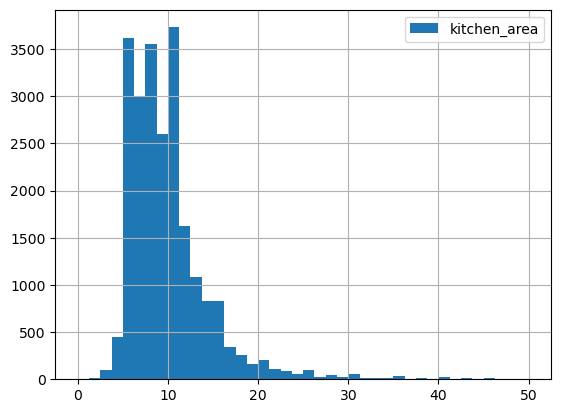

In [26]:
data['kitchen_area'].hist(bins=40, grid=True, legend='kitchen_area', range=(0,50))

Remove outliers above 40.

In [27]:
data = data[data['kitchen_area'] <= 40]

Plot a histogram for `last_price`.

<Axes: >

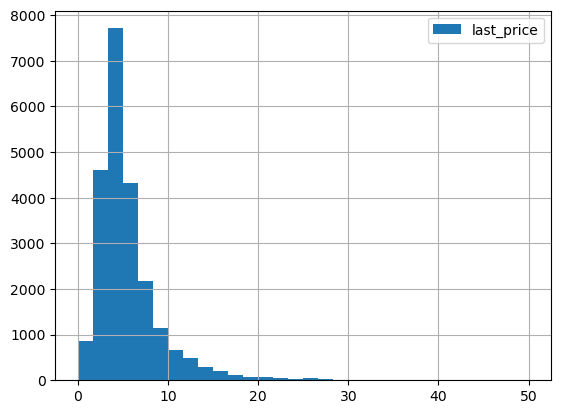

In [28]:
# divide last_price on 1m to get more appropriate numbers
last_price_for_hist = data['last_price'] / 1000000
last_price_for_hist.hist(grid=True, legend='last_price', bins=30, range=(0,50))

Plot a histogram for `rooms`.

<Axes: >

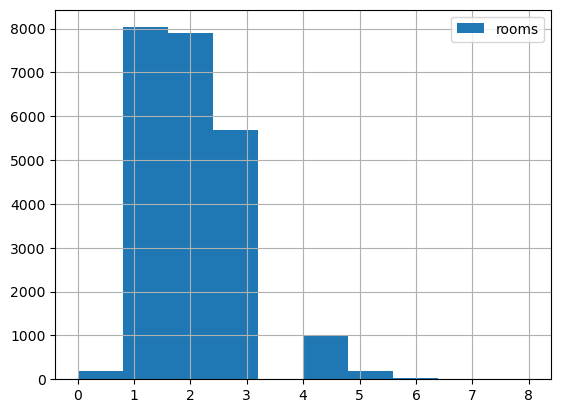

In [29]:
data['rooms'].hist(bins=10, grid=True, legend='rooms')

Remove outliers above 8.

In [30]:
data = data[data['rooms'] <= 8]

Plot a histogram for `ceiling_height`.

<Axes: >

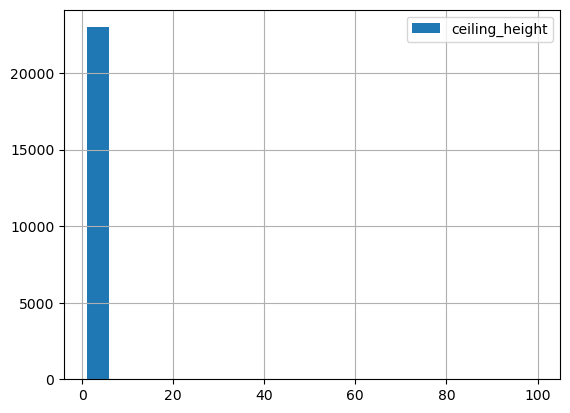

In [31]:
data['ceiling_height'].hist(bins=20, grid=True, legend='ceiling_height')

For rows where the ceiling height is greater than 10, divide the value by 10, as sellers likely forgot to include a decimal point. Remove rare values exceeding 4.


In [32]:
# Identify Incorrect Values
wrong_ceiling_height = data[data['ceiling_height'] > 10]['ceiling_height'].unique()

# Correct the Errors
for i in wrong_ceiling_height:
    data['ceiling_height'] = data['ceiling_height'].replace(i, i / 10)

# Remove Rare Values
data = data[data['ceiling_height'] <= 4]

Plot a histogram for `floor_type`.

<Axes: >

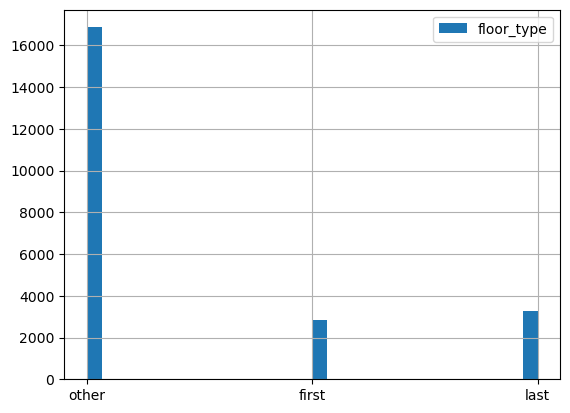

In [33]:
data['floor_type'].hist(bins=30, grid=True, legend='floor_type')

Plot a histogram for `floors_total`.

<Axes: >

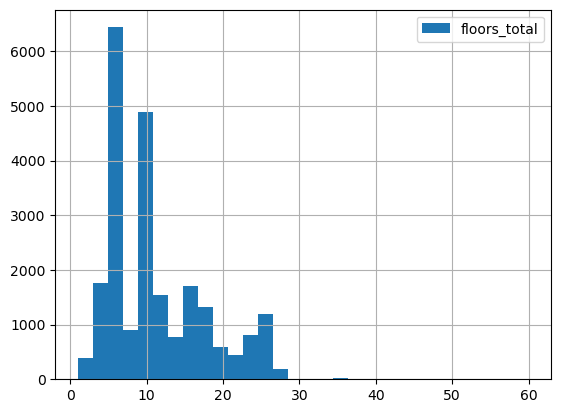

In [34]:
data['floors_total'].hist(bins=30, grid=True, legend='floors_total')

Remove outliers above 30.

In [35]:
data = data[data['floors_total'] <= 30]

Plot a histogram for `cityCenters_nearest`.

<Axes: >

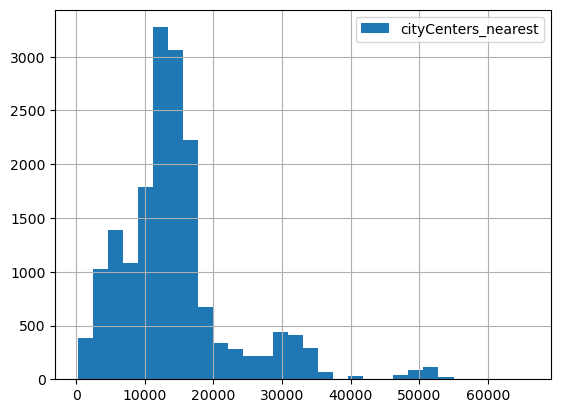

In [36]:
data['cityCenters_nearest'].hist(bins=30, grid=True, legend='cityCenters_nearest')

Plot a histogram for `parks_nearest`.

<Axes: >

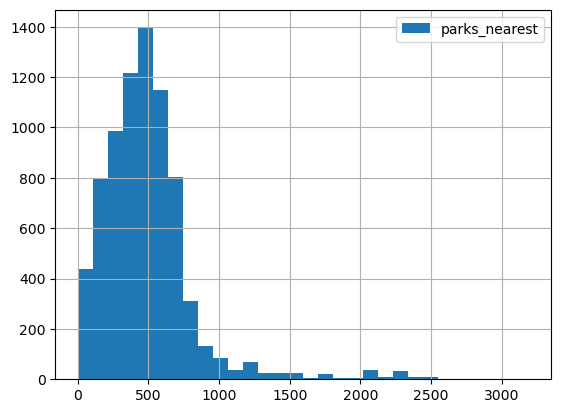

In [37]:
data['parks_nearest'].hist(bins=30, grid=True, legend='parks_nearest')

### 3.2 Study how quickly apartments were sold.

Plot a histogram for `days_exposition` and calculate the mean and median.

177.79931836407377
93.0


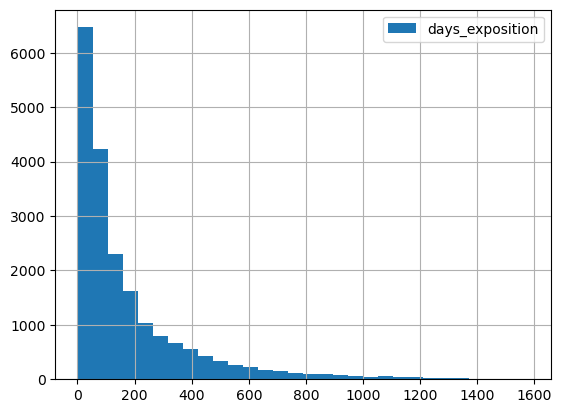

In [38]:
data['days_exposition'].hist(bins=30, grid=True, legend='days_exposition')

print(data['days_exposition'].mean())
print(data['days_exposition'].median())

The average duration of sale is 178 days, while the median is 93 days — almost a twofold difference. Clearly, a small proportion of extremely high values significantly skews the average.

Plot a graph of the average time to sell an apartment.

<Axes: xlabel='first_day_exposition'>

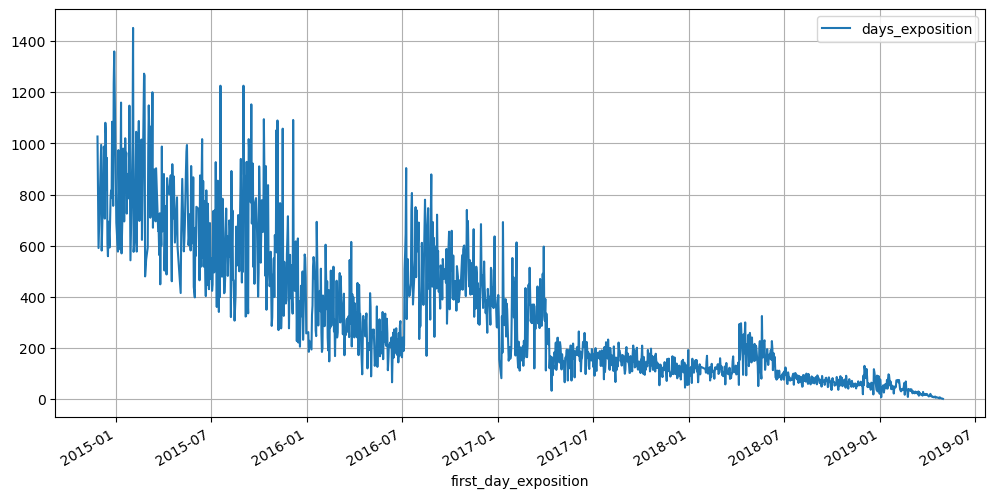

In [39]:
(
    data.pivot_table(index='first_day_exposition', values='days_exposition')\
    .plot(grid=True, figsize=(12,6))
)

There are several abnormally high values; we will remove them and present the median instead of the mean.

<Axes: xlabel='first_day_exposition'>

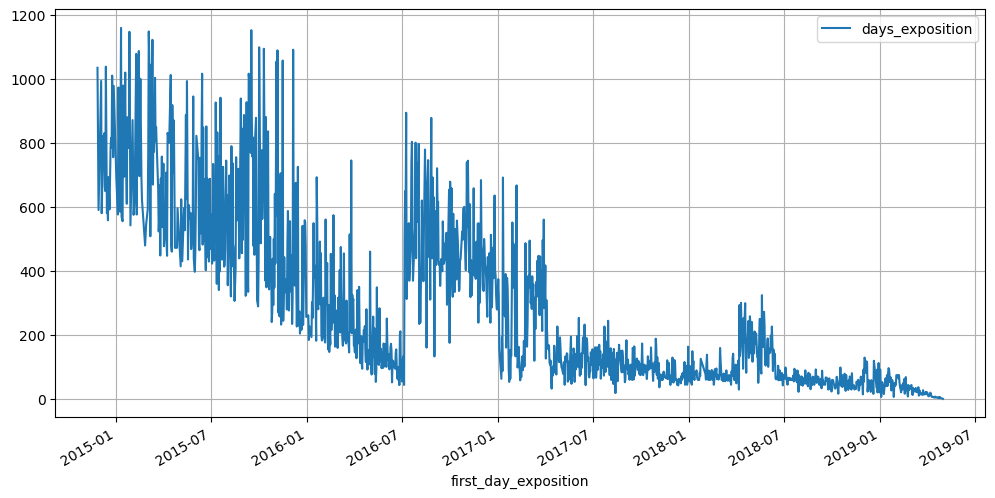

In [40]:
(
    data.query('days_exposition < 1200')
    .pivot_table(index='first_day_exposition', values='days_exposition', aggfunc='median')\
    .plot(grid=True, figsize=(12,6))
)

The average time to sell an apartment gradually decreased. Interestingly, since mid-2017, the figure has remained at a low level, with minor fluctuations in 2018 until the end of the observations.


Let’s examine how the sale duration is distributed across localities.

In [41]:
(
    data.query('days_exposition < 1200')
    .pivot_table(index='locality_name', values='days_exposition', aggfunc='median')
    .sort_values(by='days_exposition', ascending=False)
)

,days_exposition
locality_name,
поселок Севастьяново,1069.0
поселок Молодежное,1043.0
деревня Рабитицы,1007.0
поселок Коробицыно,750.0
поселок Любань,654.0
...,...
садовое товарищество Садко,7.0
поселок Счастье,7.0
деревня Яльгелево,7.0


Interestingly, there is a small number of localities with abnormally long (3 years) and abnormally short (5-10 days) sale durations. In any case, the median sale duration of 95 days seems quite realistic.

### 3.3 Determine the factors that have the greatest impact on the total price of the property.

Examine whether the price depends on the total area.

Correlation equals: 0.7029004676567713


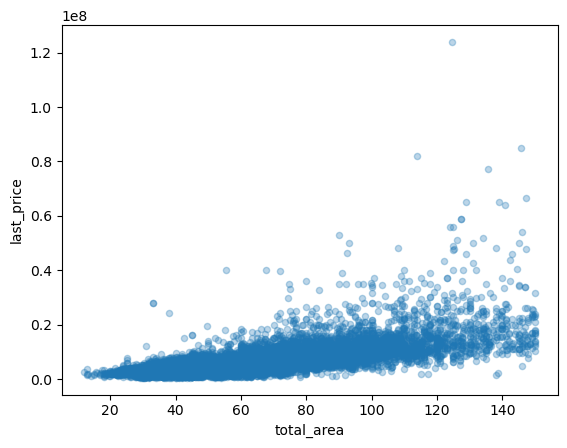

In [42]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3) 
print('Correlation equals:', data['last_price'].corr(data['total_area']))

If the correlation between price and total area is 0.7, it indicates a strong positive linear correlation between these two variables. Thus, it can be assumed that as the total area of the apartment increases, the price also increases, and vice versa.

Examine whether the price depends on the living area.

Correlation equals: 0.5939106060559669


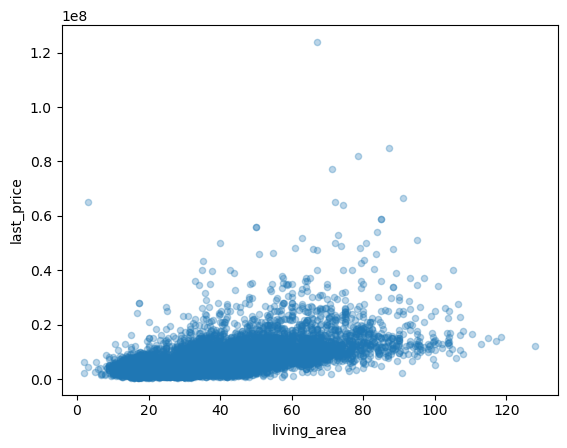

In [43]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3) 
print('Correlation equals:', data['last_price'].corr(data['living_area']))

The correlation coefficient between price and living area is 0.59, indicating a moderate positive linear correlation between these two variables. A value of 0.59 is close to 1, suggesting that, on average, an increase in the living area of an apartment is accompanied by an increase in price, and vice versa.


Examine whether the price depends on the kitchen area.


Correlation equals: 0.5406337049632267


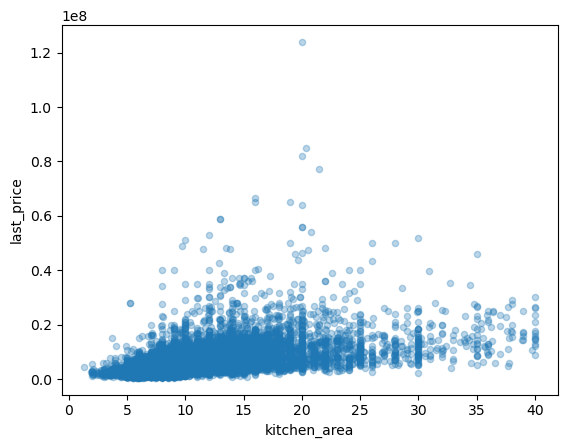

In [44]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3) 
print('Correlation equals:', data['last_price'].corr(data['kitchen_area']))

The correlation coefficient between price and kitchen area is 0.5, indicating a positive linear correlation between these two variables. A value of 0.5 suggests that, on average, an increase in kitchen area is accompanied by an increase in price, and vice versa.

Examine whether the price depends on the number of rooms.

<Axes: xlabel='rooms', ylabel='last_price'>

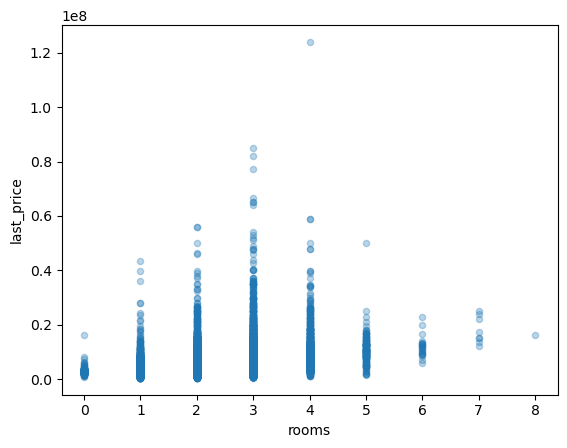

In [45]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3) 

The number of rooms has a moderate impact on price, but the relationship is not strictly linear. The trend is more pronounced for smaller properties (1-4 rooms) and diminishes for larger ones. This suggests diminishing returns in price as the number of rooms increases.

Let's study how the price depends on the other categorical variables.

Price to floor_type:

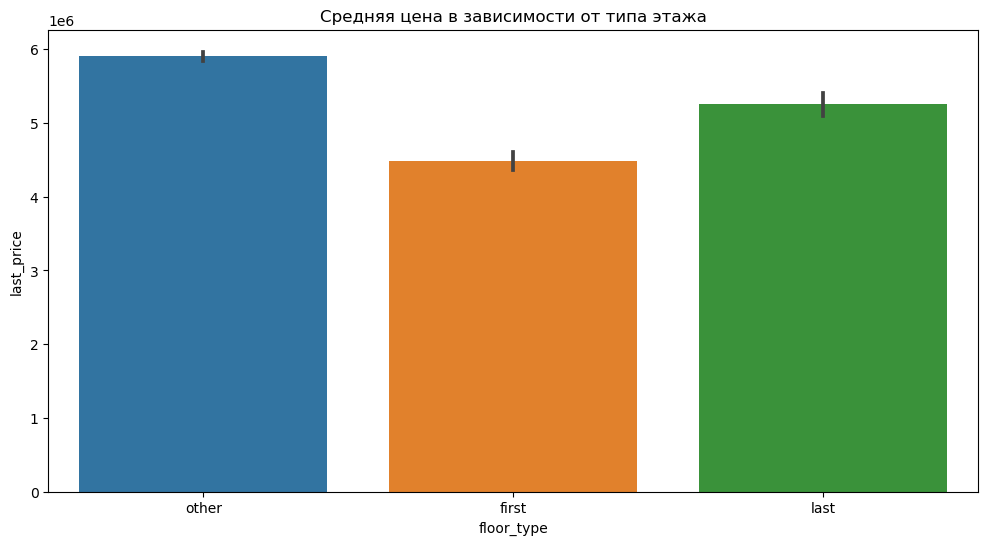

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(x='floor_type', y='last_price', data=data)
plt.title('Средняя цена в зависимости от типа этажа')
plt.show()

No strong correlation was found, but it is evident that apartments not located on the first or last floors tend to cost less.

Examine whether the price depends on the day of the week, month, or year of listing.

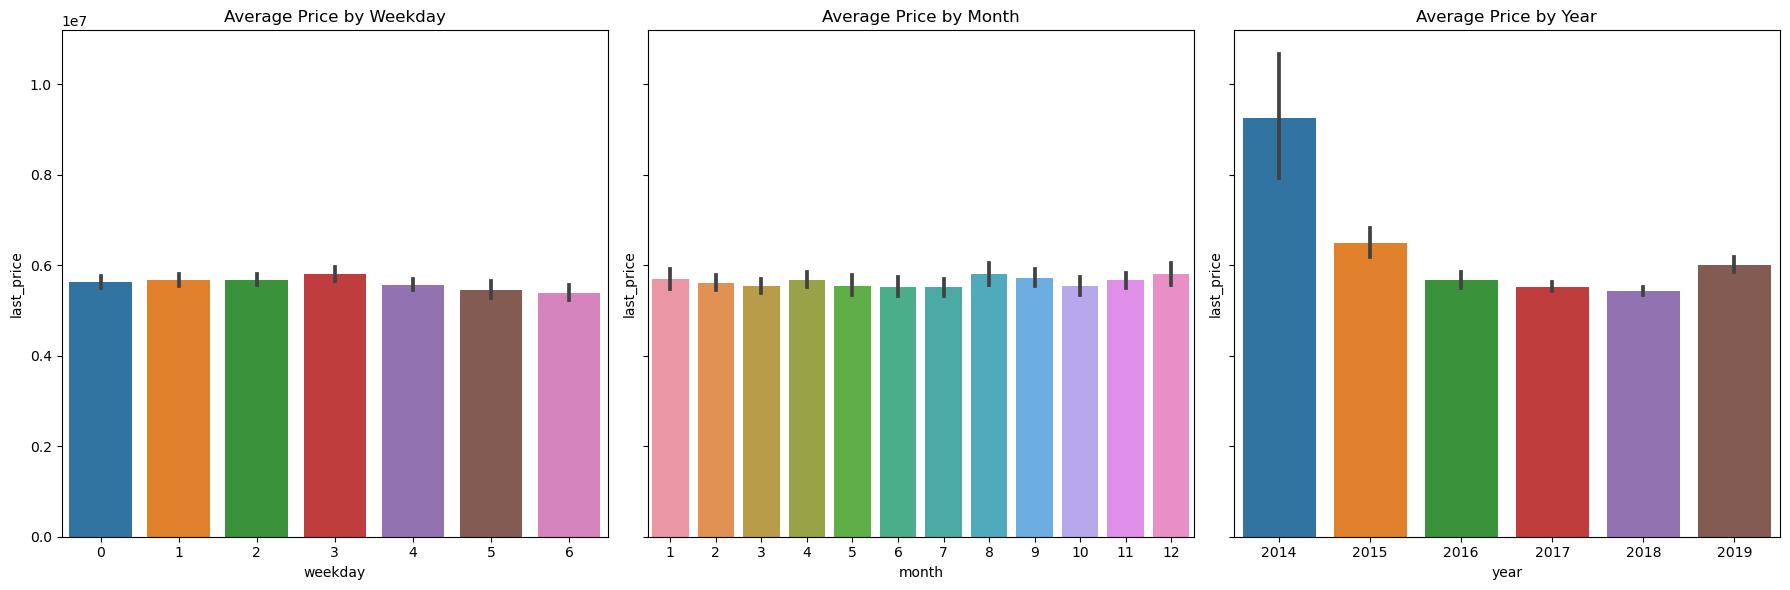

In [47]:
# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for weekdays
sns.barplot(ax=axes[0], x='weekday', y='last_price', data=data)
axes[0].set_title('Average Price by Weekday')

# Plot for months
sns.barplot(ax=axes[1], x='month', y='last_price', data=data)
axes[1].set_title('Average Price by Month')

# Plot for years
sns.barplot(ax=axes[2], x='year', y='last_price', data=data)
axes[2].set_title('Average Price by Year')

# Adjust layout for better fit
plt.tight_layout()
plt.show()

Day of the Week and Month have little to no impact on average property prices.
The year of listing shows a more significant trend, with higher prices in 2014 and a gradual decline in subsequent years. This could indicate broader economic or market changes.

## 4. Calculate the average price per square meter in the 10 localities with the highest number of listings.

In [48]:
locality_prices_pivot = (
    data.pivot_table(index='locality_name' , values='price_1m2', aggfunc=['count', 'mean'])
    .round(2)
)

locality_prices_pivot.columns = ['number_of_deals', 'mean_price_1m2']
locality_prices_pivot = locality_prices_pivot.sort_values(by='number_of_deals', ascending=False)

print(locality_prices_pivot.head(10))

                   number_of_deals  mean_price_1m2
locality_name                                     
Санкт-Петербург              15071       111870.29
поселок Мурино                 555        85680.77
поселок Шушары                 439        78703.26
Всеволожск                     396        68654.22
Пушкин                         355       102587.36
Колпино                        337        75333.30
поселок Парголово              326        90332.26
Гатчина                        307        68746.15
деревня Кудрово                299        92473.55
Выборг                         234        58027.19


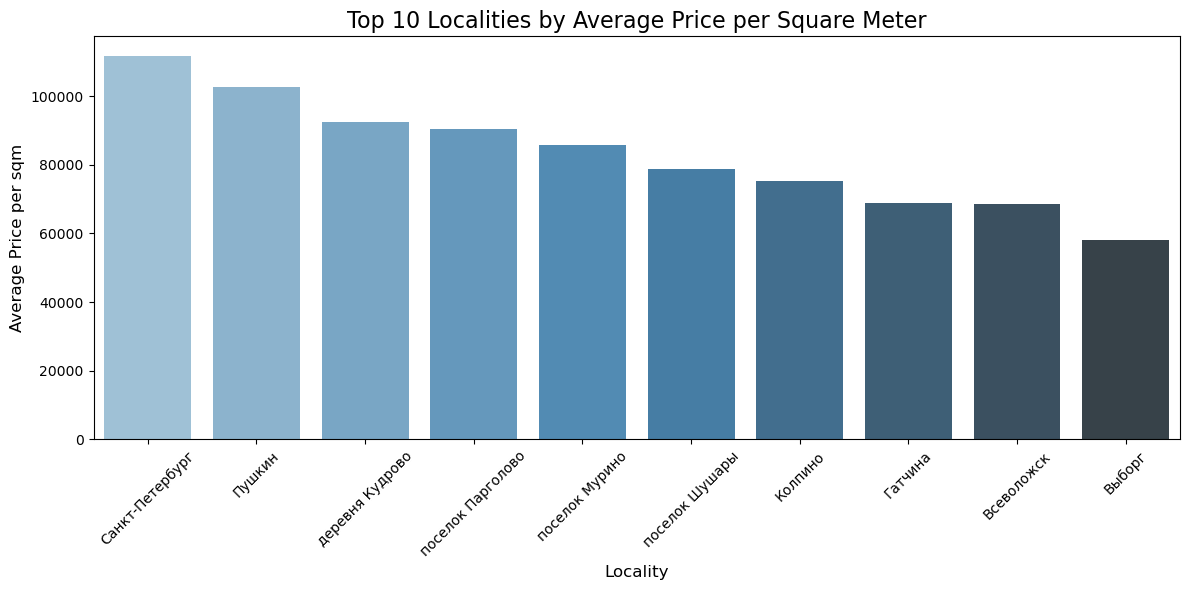

In [49]:
top10_localities = (
    locality_prices_pivot.head(10)
    .sort_values(by='mean_price_1m2', ascending=False)
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10_localities, 
    x='locality_name', y='mean_price_1m2', palette='Blues_d'
)
plt.title('Top 10 Localities by Average Price per Square Meter', fontsize=16)
plt.xlabel('Locality', fontsize=12)
plt.ylabel('Average Price per sqm', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

The largest supply of apartments (about 2/3) and the highest price per square meter are observed in St. Petersburg, while the smallest supply and the lowest price per square meter in the top-10 list are found in Vyborg.

## 5. Calculate the average apartment price in St. Petersburg based on the distance from the city center.

<Figure size 1200x600 with 0 Axes>

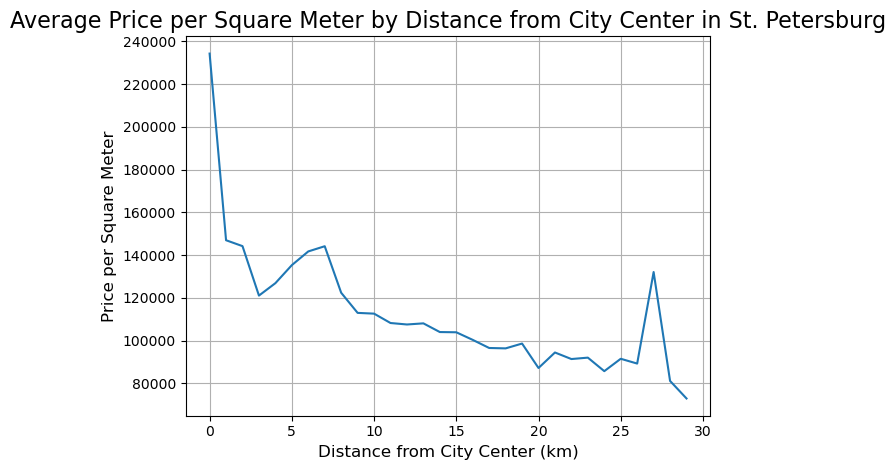

In [50]:
st_petersburg_prices = (
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_km', values='price_1m2')
)

plt.figure(figsize=(12, 6))
st_petersburg_prices.plot(grid=True, legend=False)
plt.title('Average Price per Square Meter by Distance from City Center in St. Petersburg', fontsize=16)
plt.xlabel('Distance from City Center (km)', fontsize=12)
plt.ylabel('Price per Square Meter', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

As expected, the most expensive apartments are located in the city center. With increasing distance up to the 3rd kilometer, the average price decreases from 280,000 to 160,000. From 3 to 7 kilometers, there is a gradual rise to 210,000, followed by a continued decline to 110,000 at the 20th kilometer from the center. A sharp increase of nearly 50% is observed between the 24th and 27th kilometers, with prices rising from 125,000 to 180,000 per square meter.

## 6. Summary

**Key Findings from Apartment Sales Analysis:**

1. **Sale Duration**:
- The average sale duration is 178 days, while the median is 93 days. The significant difference between the average and median indicates the presence of a small proportion of extremely high values that skew the average.
- The average sale duration has been gradually decreasing since mid-2017 and has remained low with minor fluctuations in 2018 until the end of the observations.

2. **Correlation Between Price and Apartment Features**:
- **Total Area**: There is a strong positive linear correlation between price and total area (correlation coefficient: 0.7), confirming that larger apartments tend to be more expensive.
- **Living Area**: A positive but weaker correlation exists between price and living area (correlation coefficient: 0.59).
- **Kitchen Area**: A moderate positive correlation is observed between price and kitchen area (correlation coefficient: 0.5).
- **Number of Rooms**: A medium positive correlation is observed between price and the number of rooms.
- **Floor Type**: No significant correlation between price and floor type was detected.

3. **Dependence of Price on Listing Time**:
- No correlation was found between apartment price and the day of the week, month, or year of listing. This suggests no clear linear relationship between price and the time of listing.

4. **Regional Differences**:
- St. Petersburg has the highest supply of apartments (around 2/3 of all listings) and the highest price per square meter.
- Vyborg has the lowest supply and the lowest average price per square meter among the top 10 localities by the number of listings.
- The average price per square meter is higher in the city center compared to the outskirts.

5. **Dependence of Price on Distance from the City Center**:
- Prices are higher in the city center compared to the outskirts.
- Prices increase as properties get closer to the central kilometers and then decline with increasing distance from the city center.

**Overall Conclusion**:
The analysis reveals that apartment price significantly depends on features such as total area, living area, number of rooms, and proximity to the city center. However, temporal factors such as the day of the week, month, or year of listing have little to no impact on apartment price.
